In [1]:
import numpy as np
import pandas as pd
import scipy as spy

In [2]:
data=pd.read_csv("MSFT_S&P.csv",index_col="Date")

In [3]:
sec_returns=np.log(data/data.shift(1))

In [4]:
cov=sec_returns.cov()
cov

,MSFT,^GSPC
MSFT,0.000215,0.000073
^GSPC,0.000073,0.000065


In [5]:
MSFT_beta=cov.iloc[0,1]/sec_returns["^GSPC"].var()
MSFT_beta

1.1129445152199422

## The CAPM Formula -- Ri=Rf+bi(Rm-Rf)
#### Lets assume the risk free rate is 2.5% (Rf) and the risk premium is 5% (Rm)

In [6]:
MSFT_er= 0.025+ MSFT_beta*0.05
MSFT_er #Expected return

0.08064722576099712

In [7]:
Sharpe=(MSFT_er-0.025)/(sec_returns["MSFT"].std()*250 ** 0.5)
Sharpe

0.23995502423552603

In [8]:
from scipy import stats 
import pandas_datareader as web

/home/rafael/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
start=pd.to_datetime("2010-01-04")
end=pd.to_datetime("2020-01-04")

In [10]:
spy_etf=web.DataReader("SPY","yahoo",start,end)

In [11]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348


In [12]:
aapl=web.DataReader("aapl","yahoo",start,end)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

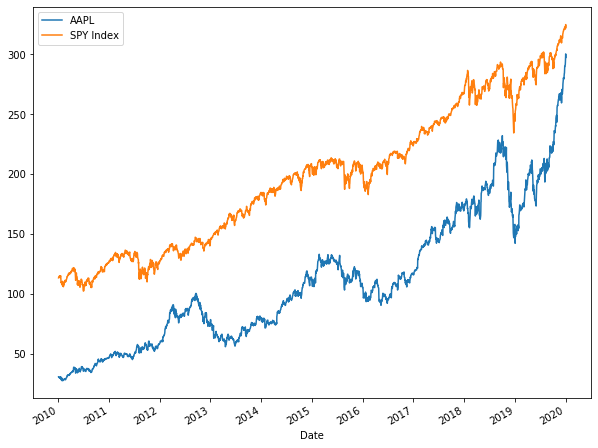

In [14]:
aapl["Close"].plot(label="AAPL",figsize=(10,8))
spy_etf["Close"].plot(label="SPY Index")
plt.legend()

In [16]:
aapl["Cumulative"]=aapl["Close"]/aapl["Close"].iloc[0]
spy_etf["Cumulative"]=spy_etf["Close"]/spy_etf["Close"][0]

Text(0.5, 1.0, 'Cumulative Return')

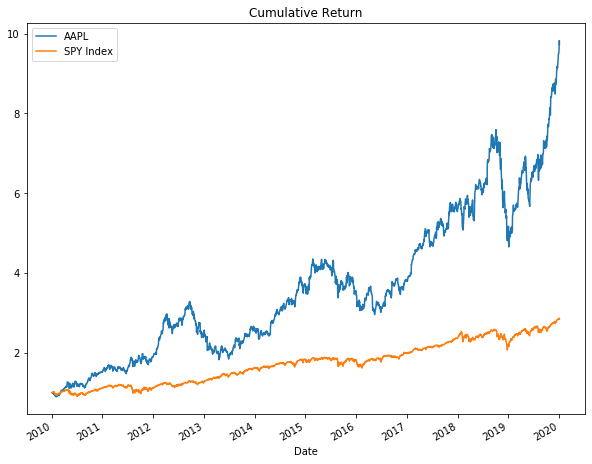

In [17]:
aapl["Cumulative"].plot(label="AAPL",figsize=(10,8))
spy_etf["Cumulative"].plot(label="SPY Index")
plt.legend()
plt.title("Cumulative Return")

In [19]:
aapl["Daily Return"]=aapl["Close"].pct_change(1)
spy_etf["Daily Return"]=spy_etf["Close"].pct_change(1)

In [20]:
beta,alpha,r_value,p_value,std_err=stats.linregress(aapl["Daily Return"].iloc[1:],spy_etf["Daily Return"].iloc[1:])

In [21]:
beta

0.3402355721091539

In [22]:
alpha

0.00010612563908308858

In [24]:
r_value

0.5946529799520281